In [33]:
!pip install pyspark

In [34]:
#first we need to initialize a SparkSession
from pyspark.sql import SparkSession

spark = SparkSession.builder \
    .appName("ModelLearning") \
    .getOrCreate()

In [35]:
df = spark.read.csv("cleaned_data.csv", header=True, inferSchema=True)

In [5]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.linear_model import SGDClassifier
from sklearn.pipeline import Pipeline
from sklearn import metrics
from sklearn.metrics import classification_report
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier


In [6]:
df = pd.read_csv('cleaned_data.csv')

df.head()

,rate,date,comment,detected_language,cleaned_comment,sentiment,clean_text
0,0.5,2020-07-30 17:47:36-07:00,ничего интересного я на этом курсе не узнал....,ru,i did not learn anything interesting in this c...,negative,"['not', 'learn', 'interesting', 'course']"
1,0.5,2021-01-28 18:05:20-08:00,I need my certificate.,en,i need my certificate,negative,"['need', 'certificate']"
2,0.5,2021-11-20 08:48:40-08:00,This is a very poor course dont this course. W...,en,this is a very poor course dont this course wa...,negative,"['poor', 'course', 'not', 'course', 'waste', '..."
3,0.5,2021-05-21 04:28:46-07:00,Is just a quiz without explanations,en,is just a quiz without explanations,negative,"['quiz', 'without', 'explanation']"
4,0.5,2017-04-30 00:08:39-07:00,the voice of this instructor is absolutely not...,en,the voice of this instructor is absolutely not...,negative,"['voice', 'instructor', 'absolutely', 'not', '..."


In [7]:
#Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['cleaned_comment'], df['sentiment'], test_size=0.2, random_state=42)

In [9]:
# from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

from sklearn.pipeline import Pipeline

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(df['clean_text'], df['sentiment'], test_size=0.2, random_state=42)

# Definw a pipeline with TF-IDF vectorizer and Logistic Regression classifier
pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1, 2))),
    ('classifier', LogisticRegression())
])

# Train the model
pipeline.fit(X_train, y_train)

# Make predictions
y_train_pred = pipeline.predict(X_train)
y_test_pred = pipeline.predict(X_test)

# Calculate accuracy
train_accuracy = accuracy_score(y_train, y_train_pred)
test_accuracy = accuracy_score(y_test, y_test_pred)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.8607
Testing Accuracy: 0.6364


In [ ]:
def predict_sentiment(comment, tfidf_vectorizer, svm_classifier):
    # vectorize the comment using the trained TF-IDF vectorizer
    comment_tfidf = tfidf_vectorizer.transform([comment])

    # predict sentiment using the trained SVM classifier
    prediction = svm_classifier.predict(comment_tfidf)[0]

    return prediction

# new comments for testing
new_comments = ["This is a great cours!", "I'm not satisfied with this learning."]

for comment in new_comments:
    prediction = predict_sentiment(comment, tfidf_vectorizer, svm_classifier)
    print(f"Comment: {comment}\nPrediction: {prediction}\n")


Comment: This is a great cours!
Prediction: positive

Comment: I'm not satisfied with this learning.
Prediction: negative



In [13]:
from sklearn.naive_bayes import MultinomialNB

# Define a new pipeline with TF-IDF vectorizer and Multinomial Naive Bayes classifier
multinomial_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1, 2))),
    ('classifier', MultinomialNB())
])

# Train the Multinomial Naive Bayes model
multinomial_pipeline.fit(X_train, y_train)

# Make predictions
y_train_pred_multinomial = multinomial_pipeline.predict(X_train)
y_test_pred_multinomial = multinomial_pipeline.predict(X_test)

# Calculate accuracy
train_accuracy_multinomial = accuracy_score(y_train, y_train_pred_multinomial)
test_accuracy_multinomial = accuracy_score(y_test, y_test_pred_multinomial)

print(f"Multinomial Naive Bayes Training Accuracy: {train_accuracy_multinomial:.4f}")
print(f"Multinomial Naive Bayes Testing Accuracy: {test_accuracy_multinomial:.4f}")


Multinomial Naive Bayes Training Accuracy: 0.8005
Multinomial Naive Bayes Testing Accuracy: 0.6240


In [16]:
from sklearn.metrics import classification_report

# Print classification report for Multinomial Naive Bayes on training data
print("Multinomial Naive Bayes Classifier - Training Data:")
print(classification_report(y_train, y_train_pred_multinomial))

# Print classification report for Multinomial Naive Bayes on testing data
print("Multinomial Naive Bayes Classifier - Testing Data:")
print(classification_report(y_test, y_test_pred_multinomial))


Multinomial Naive Bayes Classifier - Training Data:
              precision    recall  f1-score   support

    negative       0.95      0.49      0.65       642
     neutral       0.70      0.93      0.80      1028
    positive       0.91      0.87      0.89       922

    accuracy                           0.80      2592
   macro avg       0.85      0.76      0.78      2592
weighted avg       0.83      0.80      0.79      2592

Multinomial Naive Bayes Classifier - Testing Data:
              precision    recall  f1-score   support

    negative       0.81      0.24      0.37       199
     neutral       0.53      0.82      0.64       248
    positive       0.76      0.77      0.76       202

    accuracy                           0.62       649
   macro avg       0.70      0.61      0.59       649
weighted avg       0.68      0.62      0.59       649



In [ ]:
from sklearn.ensemble import RandomForestClassifier

# Train a Random Forest classifier
rf_classifier = RandomForestClassifier(random_state=42)
rf_classifier.fit(X_train_tfidf, y_train)

# Evaluate the Random Forest classifier
y_pred_rf = rf_classifier.predict(X_test_tfidf)
print("Random Forest Classifier:")
print(classification_report(y_test, y_pred_rf))


Random Forest Classifier:
              precision    recall  f1-score   support

    negative       0.61      0.32      0.42       199
     neutral       0.51      0.65      0.57       248
    positive       0.69      0.78      0.73       202

    accuracy                           0.59       649
   macro avg       0.60      0.58      0.57       649
weighted avg       0.59      0.59      0.57       649



In [14]:
from sklearn.ensemble import RandomForestClassifier

# Define a new pipeline with TF-IDF vectorizer and RandomForestClassifier
random_forest_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1, 2))),
    ('classifier', RandomForestClassifier())
])

# Train the RandomForestClassifier model
random_forest_pipeline.fit(X_train, y_train)

# Make predictions
y_train_pred_rf = random_forest_pipeline.predict(X_train)
y_test_pred_rf = random_forest_pipeline.predict(X_test)

# Calculate accuracy
train_accuracy_rf = accuracy_score(y_train, y_train_pred_rf)
test_accuracy_rf = accuracy_score(y_test, y_test_pred_rf)

print(f"Random Forest Training Accuracy: {train_accuracy_rf:.4f}")
print(f"Random Forest Testing Accuracy: {test_accuracy_rf:.4f}")


Random Forest Training Accuracy: 0.9826
Random Forest Testing Accuracy: 0.5917


In [15]:
from sklearn.metrics import classification_report

#lassification report for Random Forest on training data
print("Random Forest Classifier - Training Data:")
print(classification_report(y_train, y_train_pred_rf))

#classification report for Random Forest on testing data
print("Random Forest Classifier - Testing Data:")
print(classification_report(y_test, y_test_pred_rf))


Random Forest Classifier - Training Data:
              precision    recall  f1-score   support

    negative       1.00      0.97      0.98       642
     neutral       0.98      0.98      0.98      1028
    positive       0.98      0.99      0.99       922

    accuracy                           0.98      2592
   macro avg       0.98      0.98      0.98      2592
weighted avg       0.98      0.98      0.98      2592

Random Forest Classifier - Testing Data:
              precision    recall  f1-score   support

    negative       0.62      0.36      0.45       199
     neutral       0.53      0.62      0.57       248
    positive       0.66      0.78      0.71       202

    accuracy                           0.59       649
   macro avg       0.60      0.59      0.58       649
weighted avg       0.60      0.59      0.58       649



In [18]:
from sklearn.linear_model import LogisticRegression

# Define a new pipeline with TF-IDF vectorizer and Logistic Regression classifier
logistic_regression_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000,ngram_range=(1, 2))),
    ('classifier', LogisticRegression())
])

# Train the Logistic Regression model
logistic_regression_pipeline.fit(X_train, y_train)

# Make predictions
y_train_pred_logistic = logistic_regression_pipeline.predict(X_train)
y_test_pred_logistic = logistic_regression_pipeline.predict(X_test)

# Calculate accuracy
train_accuracy_logistic = accuracy_score(y_train, y_train_pred_logistic)
test_accuracy_logistic = accuracy_score(y_test, y_test_pred_logistic)

print(f"Logistic Regression Training Accuracy: {train_accuracy_logistic:.4f}")
print(f"Logistic Regression Testing Accuracy: {test_accuracy_logistic:.4f}")

# Print classification report for Logistic Regression on training data
print("Logistic Regression Classifier - Training Data:")
print(classification_report(y_train, y_train_pred_logistic))

# Print classification report for Logistic Regression on testing data
print("Logistic Regression Classifier - Testing Data:")
print(classification_report(y_test, y_test_pred_logistic))



Logistic Regression Training Accuracy: 0.8607
Logistic Regression Testing Accuracy: 0.6364
Logistic Regression Classifier - Training Data:
              precision    recall  f1-score   support

    negative       0.92      0.72      0.81       642
     neutral       0.79      0.92      0.85      1028
    positive       0.92      0.89      0.91       922

    accuracy                           0.86      2592
   macro avg       0.88      0.84      0.86      2592
weighted avg       0.87      0.86      0.86      2592

Logistic Regression Classifier - Testing Data:
              precision    recall  f1-score   support

    negative       0.68      0.45      0.54       199
     neutral       0.57      0.65      0.61       248
    positive       0.70      0.80      0.74       202

    accuracy                           0.64       649
   macro avg       0.65      0.63      0.63       649
weighted avg       0.64      0.64      0.63       649



In [41]:
def predict_sentiment_logistic(comment, pipeline):
    # Use the pipeline to make predictions
    prediction = pipeline.predict([comment])[0]
    
    return prediction

new_comments = ["clueless", "very bad.","poor explanation but still good regarding to his level"]

for comment in new_comments:
    # Predict sentiment using the Logistic Regression pipeline
    prediction = predict_sentiment_logistic(comment, logistic_regression_pipeline)
    
    # Print the comment and prediction
    print(f"Comment: {comment}\nPrediction: {prediction}\n")


Comment: clueless
Prediction: neutral

Comment: very bad.
Prediction: negative

Comment: poor explanation but still good regarding to his level
Prediction: neutral



In [21]:
# Define a function to predict sentiment for new comments
def predict_sentiment(comment, pipeline):
    # Use the pipeline to make predictions
    prediction = pipeline.predict([comment])[0]
    
    return prediction

new_comments = ["This is a great course!", "not too good."]

for comment in new_comments:
    # Predict sentiment using the existing pipeline
    prediction = predict_sentiment(comment, multinomial_pipeline)
    
    # Print the comment and prediction
    print(f"Comment: {comment}\nPrediction: {prediction}\n")


Comment: This is a great course!
Prediction: positive

Comment: not too good.
Prediction: neutral



In [22]:
from sklearn import metrics
from sklearn.metrics import classification_report

In [25]:
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier

# Define pipelines for each model
svm_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('classifier', SVC())
])

gb_pipeline = Pipeline([
    ('tfidf', TfidfVectorizer(max_features=5000, ngram_range=(1, 2))),
    ('classifier', GradientBoostingClassifier())
])



# Train and evaluate each model
for name, pipeline in [('SVM', svm_pipeline), ('Gradient Boosting', gb_pipeline)]:
    # Train the model
    pipeline.fit(X_train, y_train)
    
    # Make predictions
    y_train_pred = pipeline.predict(X_train)
    y_test_pred = pipeline.predict(X_test)
    
    # Calculate accuracy
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)
    
    print(f"{name} Training Accuracy: {train_accuracy:.4f}")
    print(f"{name} Testing Accuracy: {test_accuracy:.4f}")
    
    # Print classification report for each model
    print(f"\n{name} Classifier - Training Data:")
    print(classification_report(y_train, y_train_pred))
    print(f"\n{name} Classifier - Testing Data:")
    print(classification_report(y_test, y_test_pred))
    print('\n')


SVM Training Accuracy: 0.9545
SVM Testing Accuracy: 0.6163

SVM Classifier - Training Data:
              precision    recall  f1-score   support

    negative       0.99      0.91      0.95       642
     neutral       0.92      0.97      0.95      1028
    positive       0.97      0.97      0.97       922

    accuracy                           0.95      2592
   macro avg       0.96      0.95      0.95      2592
weighted avg       0.96      0.95      0.95      2592


SVM Classifier - Testing Data:
              precision    recall  f1-score   support

    negative       0.75      0.34      0.47       199
     neutral       0.52      0.72      0.60       248
    positive       0.72      0.76      0.74       202

    accuracy                           0.62       649
   macro avg       0.66      0.61      0.60       649
weighted avg       0.65      0.62      0.60       649



Gradient Boosting Training Accuracy: 0.7704
Gradient Boosting Testing Accuracy: 0.5932

Gradient Boosting Classi

In [27]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC

# Create a pipeline for the SVC model
svm_pipeline = Pipeline([
    ('vect', CountVectorizer()),  # Convert text to word count vectors
    ('tfidf', TfidfTransformer()),  # Transform word count vectors to TF-IDF representation
    ('clf', SVC(kernel='linear', C=1.0))  # Support Vector Classifier with linear kernel
])
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split

# Assuming X_train, X_test, y_train, y_test are your training and testing data
# Assuming svm_pipeline is your SVC pipeline

# Train the SVC model
svm_pipeline.fit(X_train, y_train)

# Evaluate the model on testing data
y_pred = svm_pipeline.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.2f}")

# Generate classification report
report = classification_report(y_test, y_pred)
print("Classification Report:")
print(report)


Accuracy: 0.61
Classification Report:
              precision    recall  f1-score   support

    negative       0.62      0.40      0.49       199
     neutral       0.53      0.63      0.58       248
    positive       0.70      0.79      0.75       202

    accuracy                           0.61       649
   macro avg       0.62      0.61      0.60       649
weighted avg       0.61      0.61      0.60       649



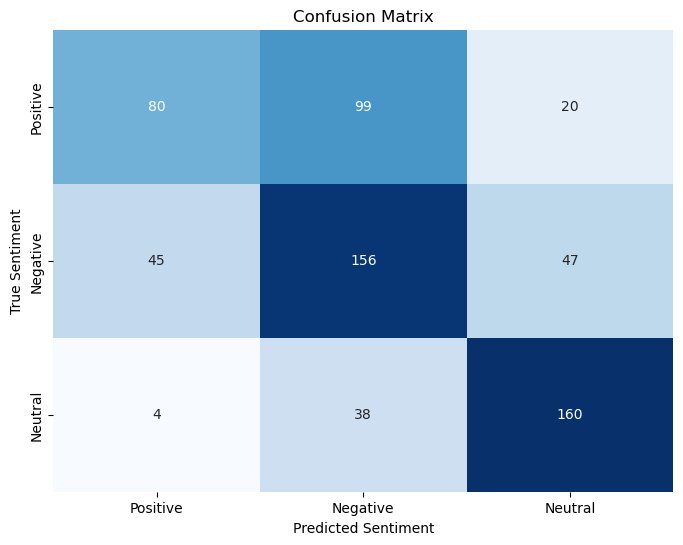

In [31]:

# Generate confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Define sentiment labels based on our data
sentiment_labels = ['Positive', 'Negative', 'Neutral']  # Update with your sentiment labels

# Visualize confusion matrix with sentiment labels
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", cbar=False, xticklabels=sentiment_labels, yticklabels=sentiment_labels)
plt.title("Confusion Matrix")
plt.xlabel("Predicted Sentiment")
plt.ylabel("True Sentiment")
plt.show()


In [37]:
pip install torch

  Obtaining dependency information for torch from https://files.pythonhosted.org/packages/2a/b7/a3cf5fd40334b9785cc83ee0c96b50603026eb3aa70210a33729018e7029/torch-2.3.0-cp311-cp311-win_amd64.whl.metadata
  Obtaining dependency information for typing-extensions>=4.8.0 from https://files.pythonhosted.org/packages/01/f3/936e209267d6ef7510322191003885de524fc48d1b43269810cd589ceaf5/typing_extensions-4.11.0-py3-none-any.whl.metadata
  Obtaining dependency information for mkl<=2021.4.0,>=2021.1.1 from https://files.pythonhosted.org/packages/fe/1c/5f6dbf18e8b73e0a5472466f0ea8d48ce9efae39bd2ff38cebf8dce61259/mkl-2021.4.0-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for intel-openmp==2021.* from https://files.pythonhosted.org/packages/6f/21/b590c0cc3888b24f2ac9898c41d852d7454a1695fbad34bee85dba6dc408/intel_openmp-2021.4.0-py2.py3-none-win_amd64.whl.metadata
  Obtaining dependency information for tbb==2021.* from https://files.pythonhosted.org/packages/7b/2d/1e1c70fae8ac

ERROR: Cannot uninstall 'TBB'. It is a distutils installed project and thus we cannot accurately determine which files belong to it which would lead to only a partial uninstall.


In [36]:
#sentiment analysis model using BERT
import torch
from transformers import BertTokenizer, BertForSequenceClassification
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load pre-trained BERT model and tokenizer
model_name = 'bert-base-uncased'
tokenizer = BertTokenizer.from_pretrained(model_name)
model = BertForSequenceClassification.from_pretrained(model_name)

# Assuming X and y are your text and corresponding sentiment labels
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Tokenize input text and convert to tensors
X_train_encoded = tokenizer(X_train, padding=True, truncation=True, return_tensors='pt')
X_test_encoded = tokenizer(X_test, padding=True, truncation=True, return_tensors='pt')

# Convert labels to tensors
y_train_tensor = torch.tensor(y_train)
y_test_tensor = torch.tensor(y_test)

# Fine-tune BERT model
optimizer = torch.optim.AdamW(model.parameters(), lr=1e-5)
model.train()
for epoch in range(3):  # Train for 3 epochs
    optimizer.zero_grad()
    outputs = model(**X_train_encoded, labels=y_train_tensor)
    loss = outputs.loss
    loss.backward()
    optimizer.step()

# Evaluate model
model.eval()
with torch.no_grad():
    outputs = model(**X_test_encoded)
    logits = outputs.logits
    predictions = torch.argmax(logits, dim=1)
    accuracy = accuracy_score(y_test, predictions)

print(f"Accuracy: {accuracy:.4f}")


ModuleNotFoundError: No module named 'torch'